In [2]:
import pandas as pd
import numpy as np

cars = pd.read_csv('cars.csv')

## General

In [3]:
cars.shape

(50, 3)

cars.csv has 50 samples and 3 features

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  50 non-null     int64
 1   speed       50 non-null     int64
 2   dist        50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


# Univariate analysis

In [5]:
cars.describe()

,Unnamed: 0,speed,dist
count,50.00000,50.000000,50.000000
mean,25.50000,15.400000,42.980000
std,14.57738,5.287644,25.769377
min,1.00000,4.000000,2.000000
25%,13.25000,12.000000,26.000000
50%,25.50000,15.000000,36.000000
75%,37.75000,19.000000,56.000000
max,50.00000,25.000000,120.000000


In [6]:
cars.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
from scipy.stats import skew, kurtosis

def skew_kurt(feature):
    return {'name':feature.name,'skewness': skew(feature), 'kurtosis': kurtosis(feature)}

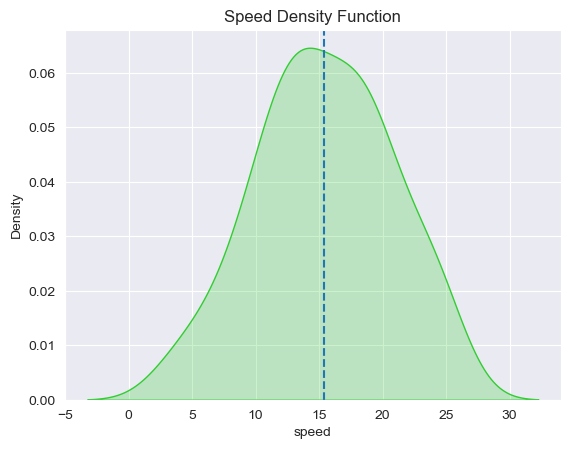

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.kdeplot(cars, x='speed', fill=True, color='limegreen')
ax.axvline(np.mean(cars['speed']),  linestyle='dashed')
plt.title('Speed Density Function with Mean')
plt.savefig('Documents/plots/cars_speeddensity.png')

In [9]:
skew_kurt(cars['speed'])

{'name': 'speed',
 'skewness': -0.11395477012828319,
 'kurtosis': -0.5771474239437371}

Absolute skewness is close to 0, distribution is almost symmetrical

Skewness is negative, slightly curved to the left, possible outliers with small values

Kurtosis of -0.57 indicates small tails and close to no outliers

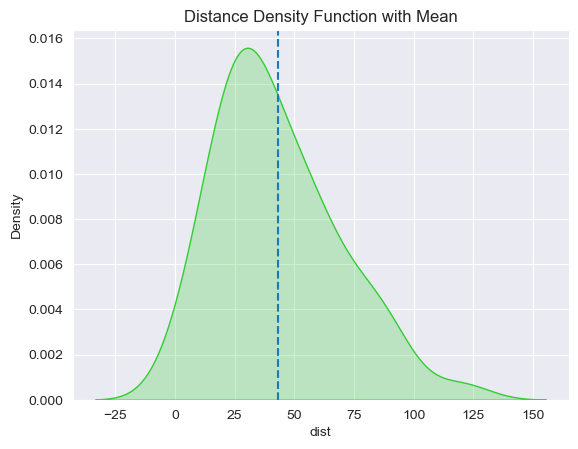

In [24]:
ax = sns.kdeplot(cars, x='dist', fill=True, color='limegreen')
ax.axvline(np.mean(cars['dist']),  linestyle='dashed')
plt.title('Distance Density Function with Mean')
plt.savefig('Documents/plots/cars_distdensity.png')

In [11]:
skew_kurt(cars['dist'])

{'name': 'dist',
 'skewness': 0.7824835173114966,
 'kurtosis': 0.24801865717051808}

Skewness is > 0.5, density is skewed to the right, not symmetrical 

Skewness is positive, curved to the right, possible outliers with greater values

Kurtosis of 0.24 indicates presence of outliers

# Bivariate analysis

<Axes: >

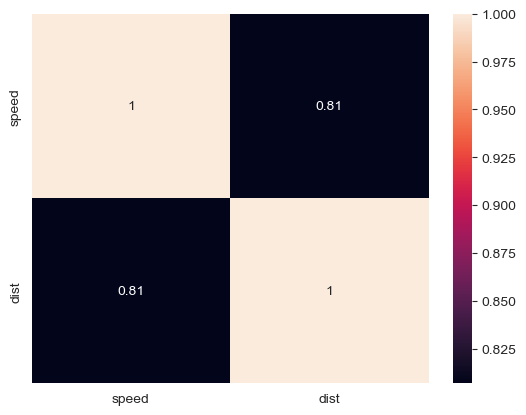

In [12]:
sns.heatmap(cars.corr(), annot=True)

Dependent (dist) and independent (speed) variables have pearson correlation of 0.81, good start for regression

In [13]:
np.cov(cars['speed'],cars['dist'])

array([[ 27.95918367, 109.94693878],
       [109.94693878, 664.06081633]])

Covariance matrix

### Simple regression line

<Axes: xlabel='speed', ylabel='dist'>

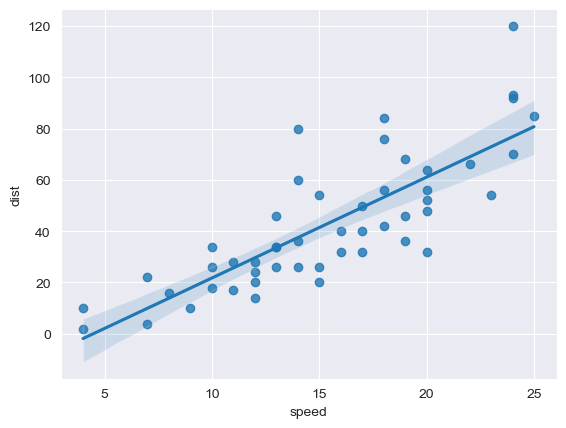

In [14]:
sns.regplot(cars, x='speed', y='dist')